Kita akan mencoba membuat model neural network untuk memprediksi customer akan memilih menunggu pesanan disuatu restoran atau tidak

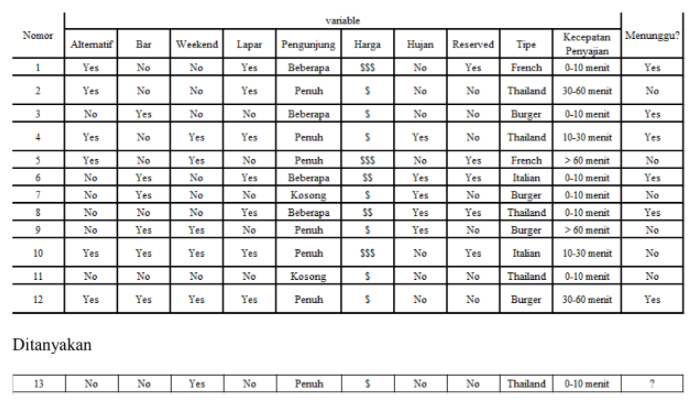

In [1]:
# import necessary module

import numpy as np
import pandas as pd

import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

In [2]:
# import dataset

dataset = pd.read_csv("Untitled.csv")
dataset.head(14)

,Alternatif,Bar,Weekend,Lapar,Pengunjung,Harga,Hujan,Reserved,Tipe,Lama_Penyajian,Menunggu?
0,Yes,No,No,Yes,Beberapa,Mahal,No,Yes,French,Sebentar,Yes
1,Yes,No,No,Yes,Penuh,Murah,No,No,Thailand,Cukup lama,No
2,No,Yes,No,No,Beberapa,Murah,No,No,Burger,Sebentar,Yes
3,Yes,No,Yes,Yes,Penuh,Murah,Yes,No,Thailand,Cukup Sebentar,Yes
4,Yes,No,Yes,No,Penuh,Mahal,No,Yes,French,Lama,No
5,No,Yes,No,Yes,Beberapa,Sedang,Yes,Yes,ltalian,Sebentar,Yes
6,No,Yes,No,No,Kosong,Murah,Yes,No,Burger,Sebentar,No
7,No,No,No,Yes,Beberapa,Sedang,Yes,Yes,Thailand,Sebentar,Yes
8,No,Yes,Yes,No,Penuh,Murah,Yes,No,Burger,Lama,No
9,Yes,Yes,Yes,Yes,Penuh,Mahal,No,Yes,Italian,Cukup Sebentar,No


In [3]:
# see shape of dataset
# baris terakhir merupakan pertanyaan

dataset.shape

(13, 11)

In [4]:
# kolom sebagai data input ke neural network
column_input = ['Alternatif', 'Bar', 'Weekend', 
                'Lapar', 'Pengunjung', 'Harga', 
                'Hujan', 'Reserved', 'Tipe', 
                'Lama_Penyajian']

# kolom sebagai target pada neural network
column_target = ['Menunggu?']

# encoding data input
data_input = pd.get_dummies(dataset, columns=column_input)
data_train = data_input.iloc[:12, 1:].to_numpy()
data_train

array([[0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 1],
       [0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 1],
       [0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0],
       [0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
        0, 0, 0, 0, 1, 0],
       [1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 1],
       [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 1],
       [1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 1, 

In [5]:
# encoding data target

label = LabelEncoder()
target = label.fit_transform(dataset['Menunggu?'])
target_train = target[0:12]
target_train

array([1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1])

In [6]:
# build neural network
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 1, input_dim = data_train.shape[1])
])

# compile
model.compile(optimizer = 'sgd', loss = 'mean_squared_error')

In [7]:
# training

model.fit(data_train, target_train, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 297ms/step - loss: 0.6573
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 0.6113
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 0.5729
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 0.5406
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 0.5132
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 0.4897
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 0.4694
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 0.4517
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 0.4362
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 0.4224
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 0.4101
Epoch 12/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3989
Epoch 13/100
1/1 [==============================] - 0s 4ms/

In [8]:
# prediksi pertanyaan
# pertanyaan berada pada baris terakhir yang tidak memiliki target

pred = data_input.iloc[12, 1:].to_numpy().reshape(1, 28)
pred = np.asarray(pred).astype('float32')
model.predict(pred)

array([[0.2833824]], dtype=float32)

Karena hasil lebih mendekati nol, maka customer akan memilih **tidak menunggu**

In [9]:
model.get_weights()

[array([[-0.3358623 ],
        [-0.05036197],
        [-0.12605095],
        [ 0.21672225],
        [ 0.11993425],
        [ 0.37382436],
        [-0.13171946],
        [ 0.39926353],
        [-0.13494036],
        [ 0.06255426],
        [-0.13803525],
        [-0.12344649],
        [-0.06522499],
        [ 0.19617373],
        [-0.00764925],
        [ 0.30674958],
        [-0.06180729],
        [-0.11334511],
        [-0.09828109],
        [ 0.3736196 ],
        [-0.11627355],
        [ 0.2691468 ],
        [-0.12129038],
        [ 0.24065514],
        [-0.3947523 ],
        [ 0.11505083],
        [ 0.02294414],
        [ 0.4489394 ]], dtype=float32),
 array([0.0578213], dtype=float32)]